# Section Recap - Data Cleaning in Pandas

## Introduction

In this section you saw you to wrangle and clean some data in Pandas! This will be a baseline skill that you will use consistently in your work whether its doing sanity checks, cleaning messy data or transforming raw datasets into useful aggregates and views. Having an understanding of the format of your data is essential to critically thinking about how you can manipulate and shape it into new and interesting forms.

## Objectives

You will be able to:

* Recall various data cleaning techniques
* Explain appropriate use cases for various data cleaning techniques

## Lambda Functions

We started out by introducing lambda functions. These are quick throw away functions that you can write on the fly. They're very useful for transforming a column feature. For example, you might want to extract the day from a date.

In [1]:
import pandas as pd
dates = pd.Series(['12-01-2017', '12-02-2017', '12-03-2017', '12-04-2017'])
dates.map(lambda x: x.split('-')[1])

0    01
1    02
2    03
3    04
dtype: object

## Combining DataFrames

You can combine dataframes by merging them (joining data by a common field) or concatenating them (appending data at the beginning or end).

In [3]:
df1 = pd.DataFrame(dates)
df2 = pd.DataFrame(['12-05-2017', '12-06-2017', '12-07-2017'])
pd.concat([df1, df2])

,0
0,12-01-2017
1,12-02-2017
2,12-03-2017
3,12-04-2017
0,12-05-2017
1,12-06-2017
2,12-07-2017


In [5]:
display(df1)
df2

,0
0,12-01-2017
1,12-02-2017
2,12-03-2017
3,12-04-2017


,0
0,12-05-2017
1,12-06-2017
2,12-07-2017


## Grouping and Aggregating

In [6]:
df = pd.read_csv('titanic.csv')
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
grouped = df.groupby(['Pclass', 'Sex'])['Age'].mean().reset_index()
grouped

,Pclass,Sex,Age
0,1,female,34.531646
1,1,male,41.025474
2,2,female,27.757353
3,2,male,30.982234
4,3,female,21.892857
5,3,male,26.437942
6,?,female,32.812500
7,?,male,32.619048


## Pivot Tables

In [13]:
pivoted = grouped.pivot(index='Pclass', columns = 'Sex', values='Age')
pivoted

Sex,female,male
Pclass,,
1,34.531646,41.025474
2,27.757353,30.982234
3,21.892857,26.437942
?,32.812500,32.619048


## Graphing

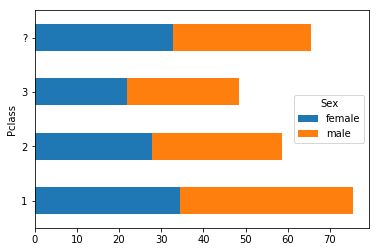

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
pivoted.plot(kind='barh', stacked = True)

## Missing Data

In [7]:
print('Top 5 Values before:\n', df.Cabin.value_counts(normalize=True).reset_index()[:5])
#Not a useful means of imputing in most cases, but a simple example to recap
df.Cabin = df['Cabin'].fillna(value="?")
print('Top 5 Values after:\n', df.Cabin.value_counts(normalize=True).reset_index()[:5])

Top 5 Values before:
          index     Cabin
0           G6  0.019608
1  C23 C25 C27  0.019608
2      B96 B98  0.019608
3      C22 C26  0.014706
4         E101  0.014706
Top 5 Values after:
          index     Cabin
0            ?  0.771044
1      B96 B98  0.004489
2  C23 C25 C27  0.004489
3           G6  0.004489
4          F33  0.003367


In [17]:
df.Cabin.value_counts(normalize = True)

B96 B98        0.019608
G6             0.019608
C23 C25 C27    0.019608
C22 C26        0.014706
D              0.014706
F2             0.014706
F33            0.014706
E101           0.014706
B35            0.009804
F4             0.009804
C92            0.009804
B77            0.009804
C2             0.009804
C65            0.009804
C52            0.009804
D36            0.009804
D26            0.009804
D17            0.009804
E8             0.009804
E25            0.009804
C126           0.009804
D20            0.009804
B58 B60        0.009804
B51 B53 B55    0.009804
B49            0.009804
C83            0.009804
B20            0.009804
B5             0.009804
B22            0.009804
D33            0.009804
                 ...   
B30            0.004902
D50            0.004902
B41            0.004902
B37            0.004902
E10            0.004902
C106           0.004902
D47            0.004902
A20            0.004902
E36            0.004902
D10 D12        0.004902
F38            0

## Summary

In this lesson you started practicing essential ETL skills that you will use throughout your data work to transform and wrangle data into useful forms.